In [ ]:
pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 

Original_data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['features']

                              name     role         type demographic  \
0                           Gender  Feature  Categorical      Gender   
1                              Age  Feature   Continuous         Age   
2                           Height  Feature   Continuous        None   
3                           Weight  Feature   Continuous        None   
4   family_history_with_overweight  Feature       Binary        None   
5                             FAVC  Feature       Binary        None   
6                             FCVC  Feature      Integer        None   
7                              NCP  Feature   Continuous        None   
8                             CAEC  Feature  Categorical        None   
9                            SMOKE  Feature       Binary        None   
10                            CH2O  Feature   Continuous        None   
11                             SCC  Feature       Binary        None   
12                             FAF  Feature   Continuous        

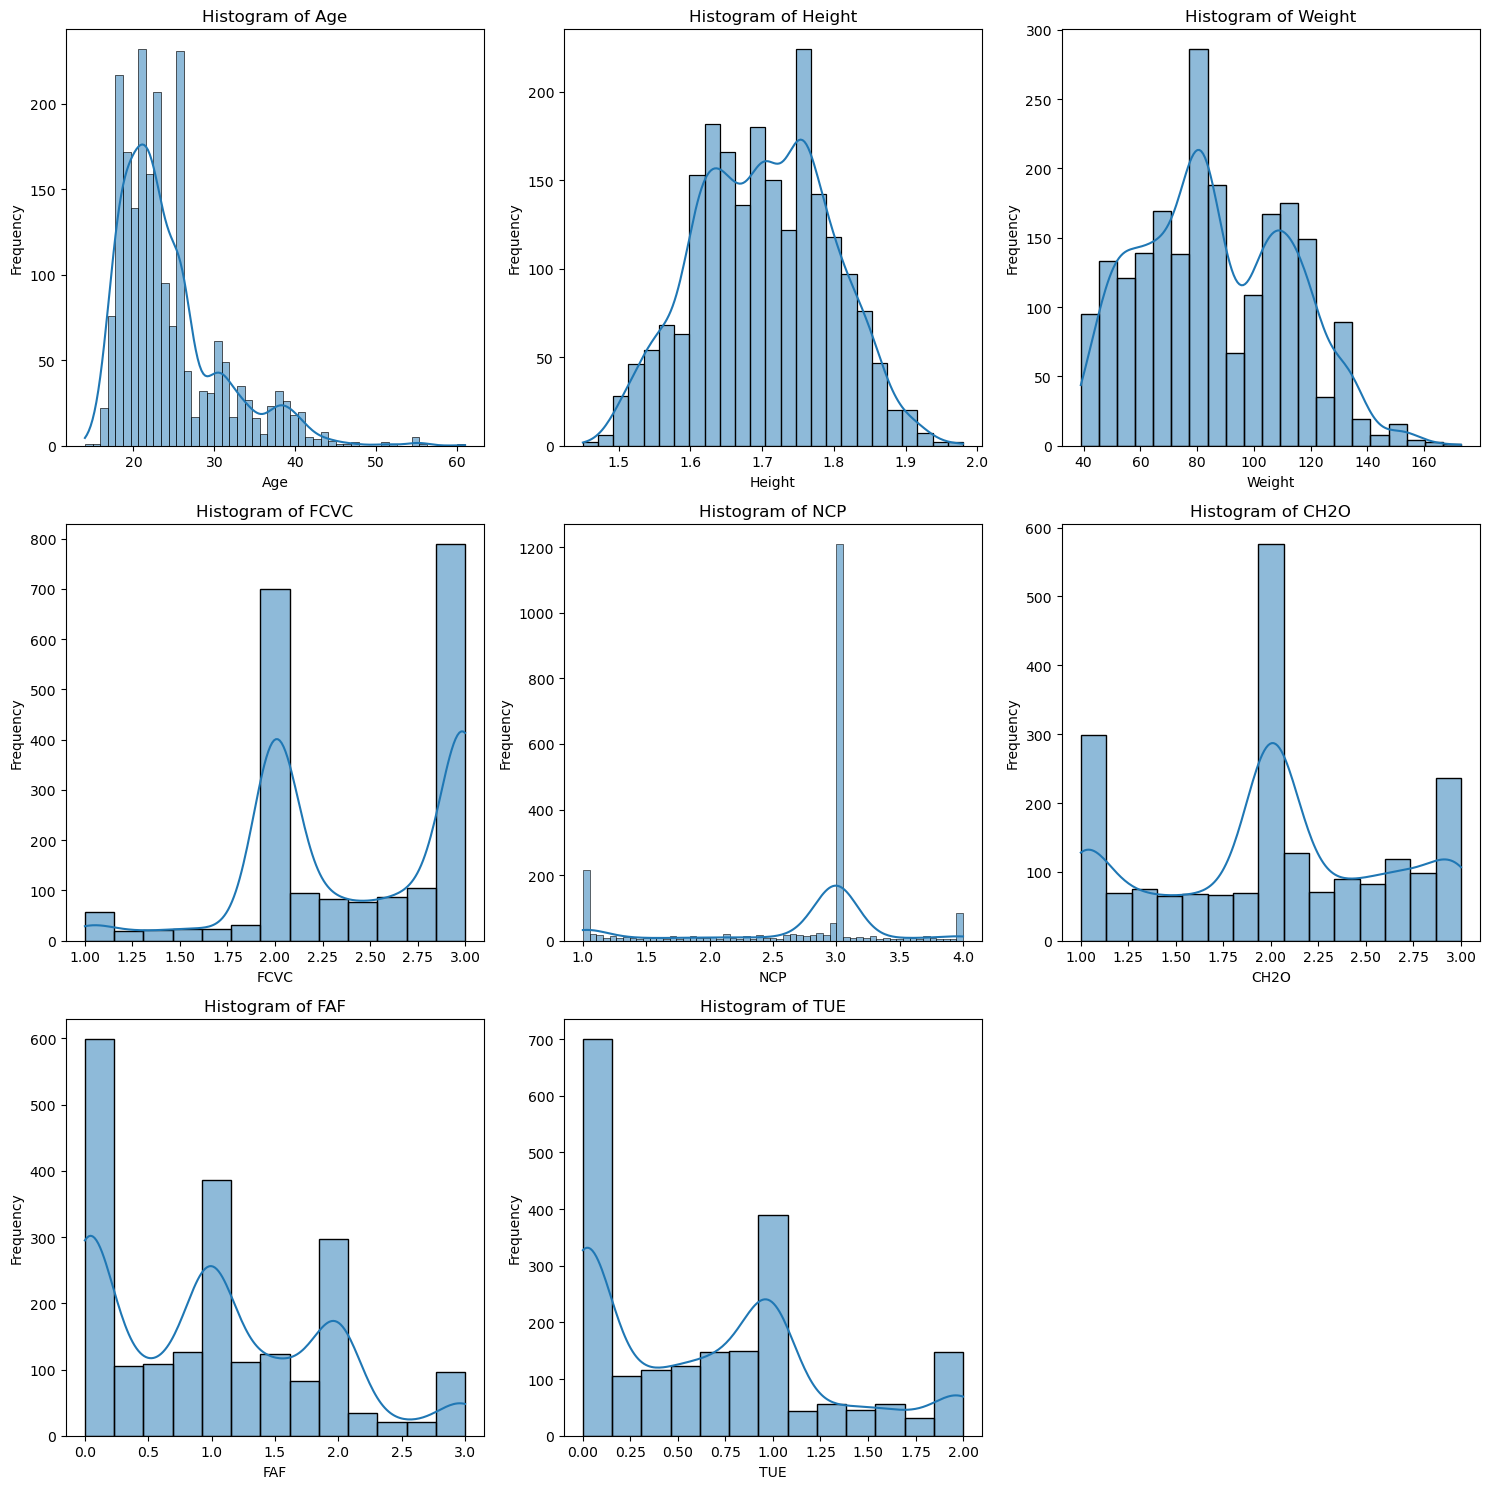

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA/ Vizulization of numeric columns

data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['features']
df = pd.DataFrame(data)

numeric_cols = df.select_dtypes(include=['number']).columns

# Set the number of subplots based on the number of numeric columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * (num_cols // 3 + 1)))

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each numeric column and create a histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [6]:
# More histogram EDA

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate data for histograms
data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['features']
df = pd.DataFrame(data)

# Create the figure and subplots
#fig, axes = plt.subplots(4, 4, figsize=(15, 10))  # 2 rows, 3 columns

# Plot histograms on each subplot
columns = df.columns
for i, ax in enumerate(axes.flat):  # Flatten the 2D array of axes
    ax.hist(df[columns[i]], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{columns[i]} Distribution')
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
#Box plots and outlier elimination

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['features']['Age']
#df = pd.DataFrame(data)

# Generate sample data
#data = np.random.normal(loc=50, scale=10, size=200)  # Normal distribution

# Create a boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(data=data, color='skyblue')
plt.title("Boxplot of Weight")
plt.show()


In [ ]:
import pandas as pd

# Convert data to a Pandas DataFrame for convenience
df = pd.DataFrame(data, columns=['Age'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_age_data = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]  # This is needed for later <<<<

print(f"Original Data Size: {len(df)}")
print(f"Filtered Data Size: {len(filtered_age_data)}")

# Optional: Create a boxplot for the filtered data
plt.figure(figsize=(4, 5))
sns.boxplot(data=filtered_age_data['Age'], color='lightgreen')
plt.title("Boxplot of Filtered Weight")
plt.show()


In [8]:


#  Step 1: Data processing step

# Normalizing numeric variables


from sklearn.preprocessing import MinMaxScaler

Norm_data = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['features']

# Columns to normalize
columns_to_normalize = ['Age', 'Weight', 'Height']

# Initialize scaler
scaler = MinMaxScaler()

# Scale only the specified columns
Norm_data[columns_to_normalize] = scaler.fit_transform(Norm_data[columns_to_normalize])

print(Norm_data.head())



   Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female  0.148936  0.320755  0.186567                            yes   no   
1  Female  0.148936  0.132075  0.126866                            yes   no   
2    Male  0.191489  0.660377  0.283582                            yes   no   
3    Male  0.276596  0.660377  0.358209                             no   no   
4    Male  0.170213  0.622642  0.379104                             no   no   

   FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Wal

C:\Users\Jesse James White\AppData\Local\Temp\ipykernel_8172\2294556881.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Norm_data[columns_to_normalize] = scaler.fit_transform(Norm_data[columns_to_normalize])


In [10]:

# Step 2: Encoding BINARY variables other than Gender

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataset
Bin_data = Norm_data

# Columns to encode
columns_to_encode = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column individually
for col in columns_to_encode:
    Bin_data[col] = encoder.fit_transform(Bin_data[col])

print(Bin_data.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0  Female  0.148936  0.320755  0.186567                               1     0   
1  Female  0.148936  0.132075  0.126866                               1     0   
2    Male  0.191489  0.660377  0.283582                               1     0   
3    Male  0.276596  0.660377  0.358209                               0     0   
4    Male  0.170213  0.622642  0.379104                               0     0   

   FCVC  NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   2.0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1   3.0  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2   2.0  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3   3.0  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4   2.0  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3 

C:\Users\Jesse James White\AppData\Local\Temp\ipykernel_8172\917168594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bin_data[col] = encoder.fit_transform(Bin_data[col])
C:\Users\Jesse James White\AppData\Local\Temp\ipykernel_8172\917168594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bin_data[col] = encoder.fit_transform(Bin_data[col])
C:\Users\Jesse James White\AppData\Local\Temp\ipykernel_8172\917168594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [12]:

# Step 3: Manually encode factor levels

from sklearn.preprocessing import LabelEncoder
import pandas as pd


Encoded_data = Bin_data
#df_encoded = pd.DataFrame(data)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['CAEC', 'CALC', 'MTRANS']

# Dictionary to store mappings
mappings = {}

# Encode each selected column and store mappings
for col in columns_to_encode:
    Encoded_data[f'{col}_encoded'] = encoder.fit_transform(Encoded_data[col])
    mappings[col] = {index: category for index, category in enumerate(encoder.classes_)}

# Display results
print("Encoded DataFrame:")
print(Encoded_data)
print("\nCategory Mappings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


Encoded DataFrame:
      Gender       Age    Height    Weight  family_history_with_overweight  \
0     Female  0.148936  0.320755  0.186567                               1   
1     Female  0.148936  0.132075  0.126866                               1   
2       Male  0.191489  0.660377  0.283582                               1   
3       Male  0.276596  0.660377  0.358209                               0   
4       Male  0.170213  0.622642  0.379104                               0   
...      ...       ...       ...       ...                             ...   
2106  Female  0.148443  0.491943  0.689616                               1   
2107  Female  0.169850  0.563366  0.707037                               1   
2108  Female  0.181362  0.570200  0.706637                               1   
2109  Female  0.220467  0.546132  0.704079                               1   
2110  Female  0.205632  0.544974  0.705020                               1   

      FAVC  FCVC  NCP       CAEC  SMOKE     

In [14]:

# Step 4: One Hot encoding Gender
data4 = Encoded_data
df = pd.DataFrame(data4)

# Manually encode 'Gender'
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender').astype(int)  # Cast to integers (0 or 1)
Fully_encoded_df = pd.concat([df, gender_dummies], axis=1).drop(columns=['Gender'])

# Deleting uneeded columns
Fully_encoded_df = Fully_encoded_df.drop(columns=['MTRANS','CALC','CAEC'])

Fully_encoded_df

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_Female,Gender_Male
0,0.148936,0.320755,0.186567,1,0,2.0,3.0,0,2.000000,0,0.000000,1.000000,2,3,3,1,0
1,0.148936,0.132075,0.126866,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,2,2,3,1,0
2,0.191489,0.660377,0.283582,1,0,2.0,3.0,0,2.000000,0,2.000000,1.000000,2,1,3,0,1
3,0.276596,0.660377,0.358209,0,0,3.0,3.0,0,2.000000,0,2.000000,0.000000,2,1,4,0,1
4,0.170213,0.622642,0.379104,0,0,2.0,1.0,0,2.000000,0,0.000000,0.000000,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1,1,3.0,3.0,0,1.728139,0,1.676269,0.906247,2,2,3,1,0
2107,0.169850,0.563366,0.707037,1,1,3.0,3.0,0,2.005130,0,1.341390,0.599270,2,2,3,1,0
2108,0.181362,0.570200,0.706637,1,1,3.0,3.0,0,2.054193,0,1.414209,0.646288,2,2,3,1,0
2109,0.220467,0.546132,0.704079,1,1,3.0,3.0,0,2.852339,0,1.139107,0.586035,2,2,3,1,0


In [16]:
# Creating a master Dataframe from all the transformed df's

Correct_df = Fully_encoded_df

Correct_df

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_Female,Gender_Male
0,0.148936,0.320755,0.186567,1,0,2.0,3.0,0,2.000000,0,0.000000,1.000000,2,3,3,1,0
1,0.148936,0.132075,0.126866,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,2,2,3,1,0
2,0.191489,0.660377,0.283582,1,0,2.0,3.0,0,2.000000,0,2.000000,1.000000,2,1,3,0,1
3,0.276596,0.660377,0.358209,0,0,3.0,3.0,0,2.000000,0,2.000000,0.000000,2,1,4,0,1
4,0.170213,0.622642,0.379104,0,0,2.0,1.0,0,2.000000,0,0.000000,0.000000,2,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1,1,3.0,3.0,0,1.728139,0,1.676269,0.906247,2,2,3,1,0
2107,0.169850,0.563366,0.707037,1,1,3.0,3.0,0,2.005130,0,1.341390,0.599270,2,2,3,1,0
2108,0.181362,0.570200,0.706637,1,1,3.0,3.0,0,2.054193,0,1.414209,0.646288,2,2,3,1,0
2109,0.220467,0.546132,0.704079,1,1,3.0,3.0,0,2.852339,0,1.139107,0.586035,2,2,3,1,0


In [18]:
# Reponse variable

target_var = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition['data']['targets']

target_var

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:








# K- MEANS SECTION







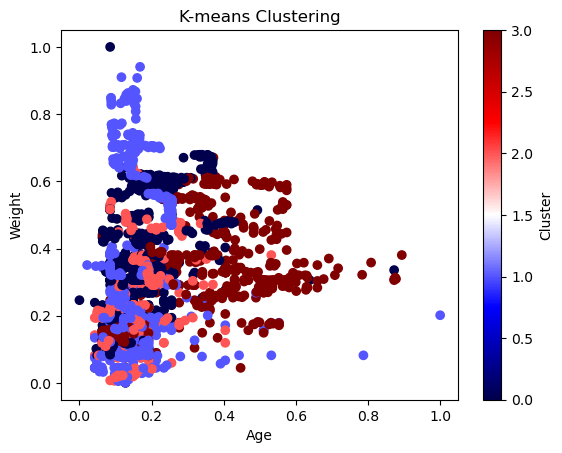

In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Example nested dictionary dataset

# Step 1: Extract the features DataFrame
features_df = Fully_encoded_df

# Step 4: Convert to NumPy array for k-means
data = features_df.values

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Age and Weight)
plt.scatter(features_df['Age'], features_df['Weight'], c=labels, cmap='seismic', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


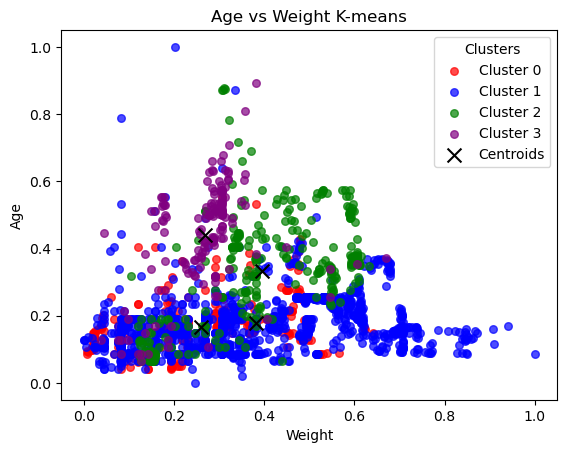

In [106]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Extract the features DataFrame
features_df = Fully_encoded_df

# Step 4: Convert to NumPy array for k-means
data = features_df.values

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Height and Age)
# Plot each cluster separately to create a categorical legend
colors = ['red', 'blue', 'green', 'purple']  # Define cluster colors
cluster_labels = [f'Cluster {i}' for i in range(k)]  # Define cluster names

# Create the scatter plot
for i, color in enumerate(colors):
    plt.scatter(
        features_df['Weight'][labels == i],
        features_df['Age'][labels == i],
        color=color,
        label=cluster_labels[i],
        s=30,  # Point size
        alpha=0.7  # Transparency
    )

# Add centroids (optional)
plt.scatter(
    centroids[:, features_df.columns.get_loc('Weight')],
    centroids[:, features_df.columns.get_loc('Age')],
    color='black',
    marker='x',
    s=100,
    label='Centroids'
)

# Add legend, labels, and title
plt.xlabel('Weight')
plt.ylabel('Age')
plt.title('Age vs Weight K-means')
plt.legend(title='Clusters')  # Add a legend
plt.show()


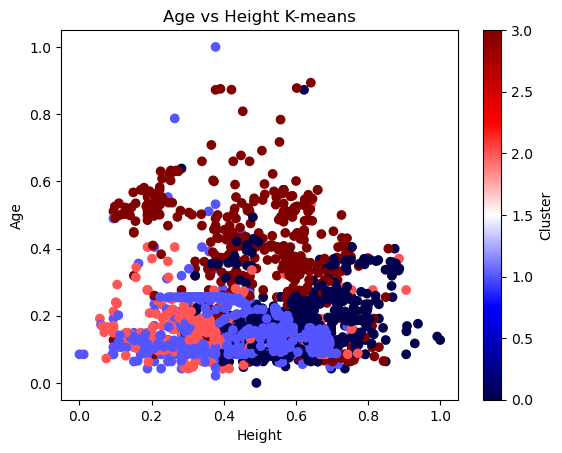

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Extract the features DataFrame
features_df = Fully_encoded_df

# Step 4: Convert to NumPy array for k-means
data = features_df.values

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Age and Weight)
plt.scatter(features_df['Height'], features_df['Age'], c=labels, cmap='seismic', label='Data Points')
plt.xlabel('Height')
plt.ylabel('Age')
plt.title('Age vs Height K-means')
plt.colorbar(label='Cluster')
plt.show()


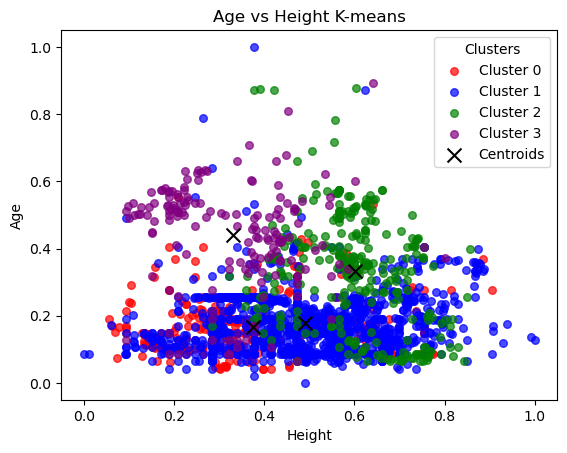

In [104]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Extract the features DataFrame
features_df = Fully_encoded_df

# Step 4: Convert to NumPy array for k-means
data = features_df.values

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Height and Age)
# Plot each cluster separately to create a categorical legend
colors = ['red', 'blue', 'green', 'purple']  # Define cluster colors
cluster_labels = [f'Cluster {i}' for i in range(k)]  # Define cluster names

# Create the scatter plot
for i, color in enumerate(colors):
    plt.scatter(
        features_df['Height'][labels == i],
        features_df['Age'][labels == i],
        color=color,
        label=cluster_labels[i],
        s=30,  # Point size
        alpha=0.7  # Transparency
    )

# Add centroids (optional)
plt.scatter(
    centroids[:, features_df.columns.get_loc('Height')],
    centroids[:, features_df.columns.get_loc('Age')],
    color='black',
    marker='x',
    s=100,
    label='Centroids'
)

# Add legend, labels, and title
plt.xlabel('Height')
plt.ylabel('Age')
plt.title('Age vs Height K-means')
plt.legend(title='Clusters')  # Add a legend
plt.show()


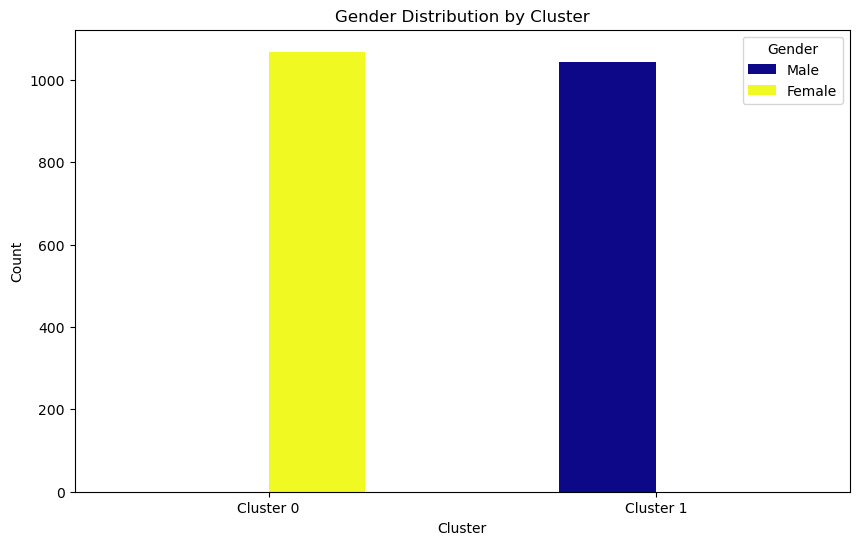

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming features_df is the processed DataFrame and labels are from k-means clustering
features_df['Cluster'] = labels  # Add cluster labels to the DataFrame

# Step 1: Group by Cluster and Gender
gender_distribution = features_df.groupby(['Gender_Female', 'Gender_Male']).size().unstack(fill_value=0)

# Step 2: Prepare the bar chart
clusters = gender_distribution.index
genders = ['Male', 'Female']  # Adjust according to your encoding
gender_distribution.columns = genders  # Rename columns for clarity

# Step 3: Plot
gender_distribution.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='plasma')

# Add labels and title
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(ticks=np.arange(len(clusters)), labels=[f'Cluster {c}' for c in clusters], rotation=0)
plt.show()


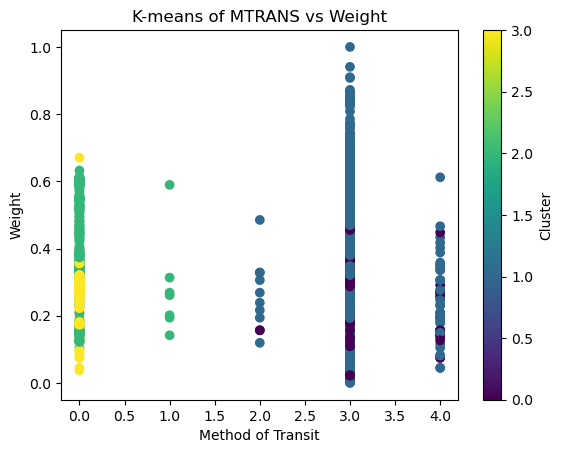

In [116]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Example nested dictionary dataset
data_dict = Correct_df

# Step 1: Extract the features DataFrame
#features_df = data_dict


# Step 4: Convert to NumPy array for k-means
data = Correct_df

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Age and Weight)
plt.scatter(features_df['MTRANS_encoded'], features_df['Weight'], c=labels, cmap='viridis', label='Data Points')
plt.xlabel('Method of Transit')
plt.ylabel('Weight')
plt.title('K-means of MTRANS vs Weight')
plt.colorbar(label='Cluster')
plt.show()


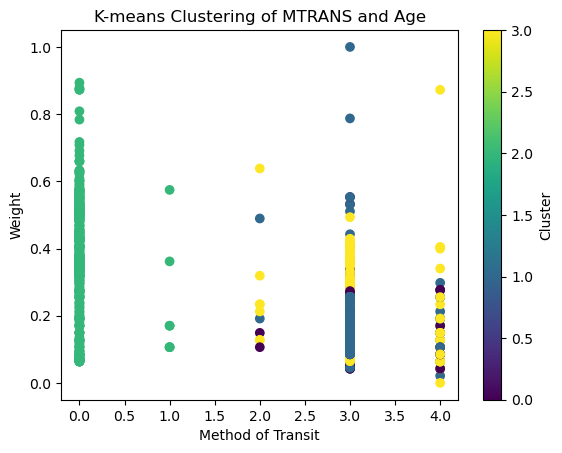

In [34]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Example nested dictionary dataset
data_dict = Correct_df

# Step 1: Extract the features DataFrame
#features_df = data_dict


# Step 4: Convert to NumPy array for k-means
data = Correct_df

# Step 5: Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 6: Visualize clustering for two features (e.g., Age and Weight)
plt.scatter(features_df['MTRANS_encoded'], features_df['Age'], c=labels, cmap='viridis', label='Data Points')


plt.xlabel('Method of Transit')
plt.ylabel('Weight')
plt.title('K-means Clustering of MTRANS and Age')
plt.colorbar(label='Cluster')
plt.show()


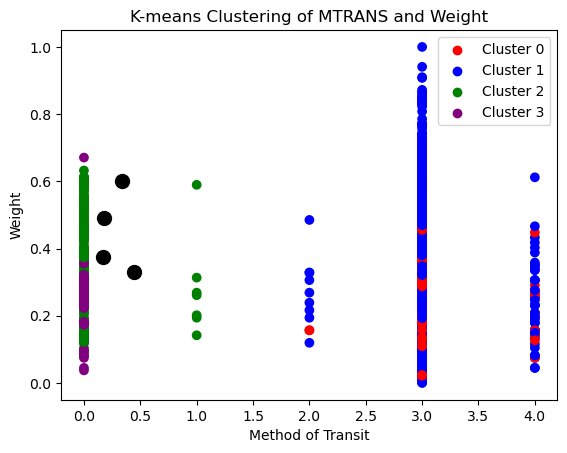

In [108]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming `Correct_df` is a DataFrame with your data
data = Correct_df

# Apply K-means
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Map cluster labels to colors
colors = ['red', 'blue', 'green', 'purple']
cluster_colors = [colors[label] for label in labels]

# Plot the data points
plt.scatter(
    Correct_df['MTRANS_encoded'],  # Replace with the column name for the first feature
    Correct_df['Weight'],         # Replace with the column name for the second feature
    color=cluster_colors
)

# Add centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    color='black', 
    #marker='x', 
    s=100
)

# Add labels, title, and legend
plt.xlabel('Method of Transit')
plt.ylabel('Weight')
plt.title('K-means Clustering of MTRANS and Weight')

# Create a legend only for the clusters
for i, color in enumerate(colors):
    plt.scatter([], [], color=color, label=f'Cluster {i}')  # Dummy points for legend

plt.legend()  # Add the legend for clusters only
plt.show()


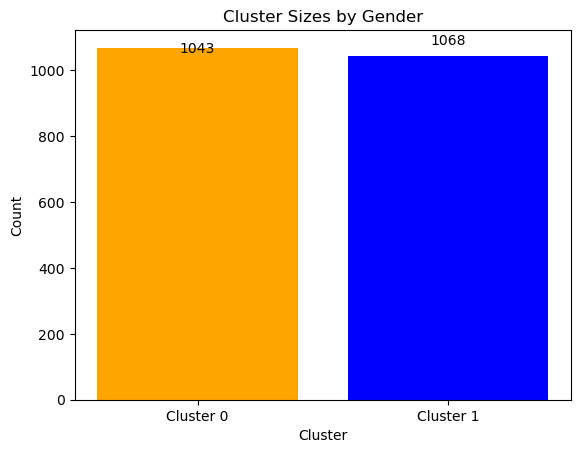

In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming `Correct_df` is a DataFrame with your data
data = Correct_df[['Gender_Female', 'Gender_Male']]

# Apply K-means
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = pd.Series(labels).value_counts(sort=False)

# Create a bar chart
cluster_colors = ['orange', 'blue']  # Define colors for each cluster

plt.bar(
    cluster_counts.index, 
    cluster_counts.values, 
    color=[cluster_colors[i] for i in cluster_counts.index]
)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Sizes by Gender')

# Customize x-axis ticks
tick_positions = cluster_counts.index  # Positions of ticks
tick_labels = [f'Cluster {i}' for i in cluster_counts.index]  # Custom labels
plt.xticks(tick_positions, tick_labels)

# Customize y-axis ticks (optional)
#plt.yticks(np.arange(0, max(cluster_counts.values) + 1, step=5))  # Adjust step size as needed

# Add numeric labels on top of the bars
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


In [ ]:


# ELBOW TEST 

testdf = testdf


# Use the Elbow Method for performance metric
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(testdf)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


# Sillouet Test


In [ ]:
from sklearn.metrics import silhouette_score

# Example with the optimal k (replace `optimal_k` with your selected value)
optimal_k = 2 # Replace with your chosen k from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(testdf)
silhouette_avg = silhouette_score(features_df, clusters)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')


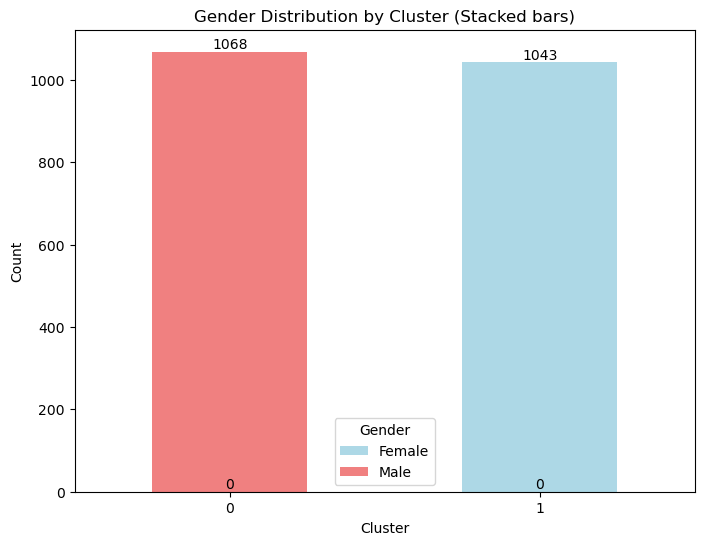

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Correct_df' contains a 'Gender' column
data = Original_data

# One-hot encode the 'Gender' feature
gender_encoded = pd.get_dummies(data['Gender'], prefix='Gender')

# Apply K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(gender_encoded)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Count the gender distribution in each cluster
gender_distribution = data.groupby('Cluster')['Gender'].value_counts().unstack()

# Plot gender distribution by cluster
ax = gender_distribution.plot(
    kind='bar', 
    stacked=True, 
    color=['lightblue', 'lightcoral'], 
    figsize=(8, 6)
)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution by Cluster (Stacked bars)')
plt.legend(title='Gender')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # Add counts inside the bars

plt.xticks(rotation=0)
plt.show()


In [58]:
# Graphs for Gender v CAEC

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Correct_df' is your DataFrame
data5 = Correct_df

# Select the one-hot encoded Gender columns and the MTRANS_encoded column
data_clustering = data5[['Gender_Male', 'Gender_Female', 'CAEC_encoded']]

# Apply K-means clustering
k = 4  # Number of clusters (adjust based on your data)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_clustering)

# Add cluster labels to the DataFrame
data5['Cluster'] = kmeans.labels_


print(data5['Cluster'].value_counts())
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print('MEANS:', data5.groupby('Cluster').mean())



Cluster
0    957
1    859
2    184
3    111
Name: count, dtype: int64
Cluster Centers:
[[ 1.00000000e+00 -9.99200722e-16  2.03761755e+00]
 [ 9.99200722e-16  1.00000000e+00  2.01746217e+00]
 [ 8.88178420e-16  1.00000000e+00  8.75000000e-01]
 [ 1.00000000e+00 -7.21644966e-16  7.29729730e-01]]
MEANS:               Age    Height    Weight  family_history_with_overweight  \
Cluster                                                                 
0        0.230901  0.582084  0.400380                        0.881923   
1        0.221159  0.371961  0.370069                        0.838184   
2        0.173815  0.330874  0.104122                        0.494565   
3        0.182517  0.585457  0.265288                        0.639640   

             FAVC      FCVC       NCP     SMOKE      CH2O       SCC       FAF  \
Cluster                                                                         
0        0.917450  2.268428  2.722667  0.024033  2.087888  0.014629  1.155853   
1        0.898719  

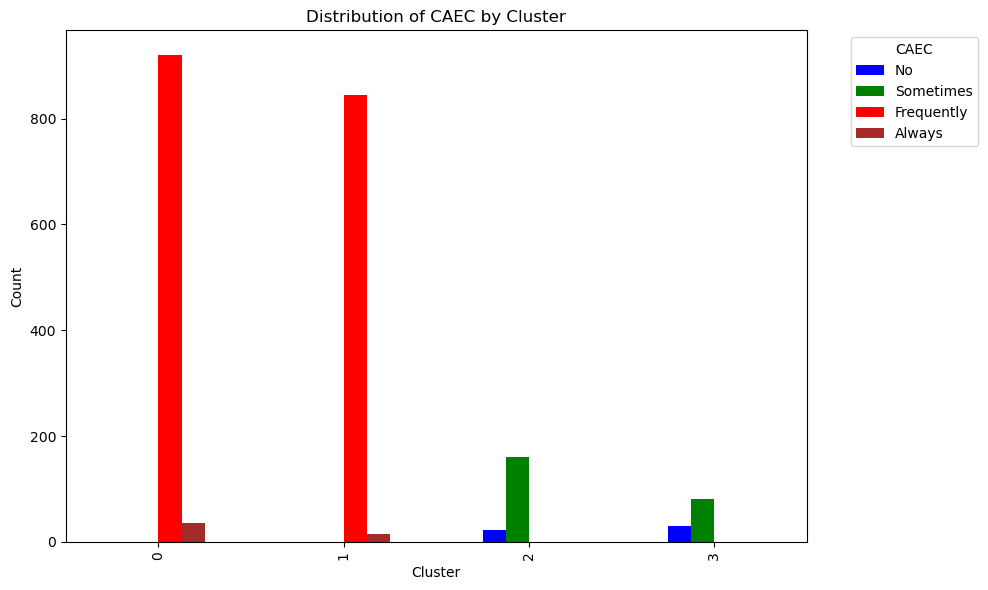

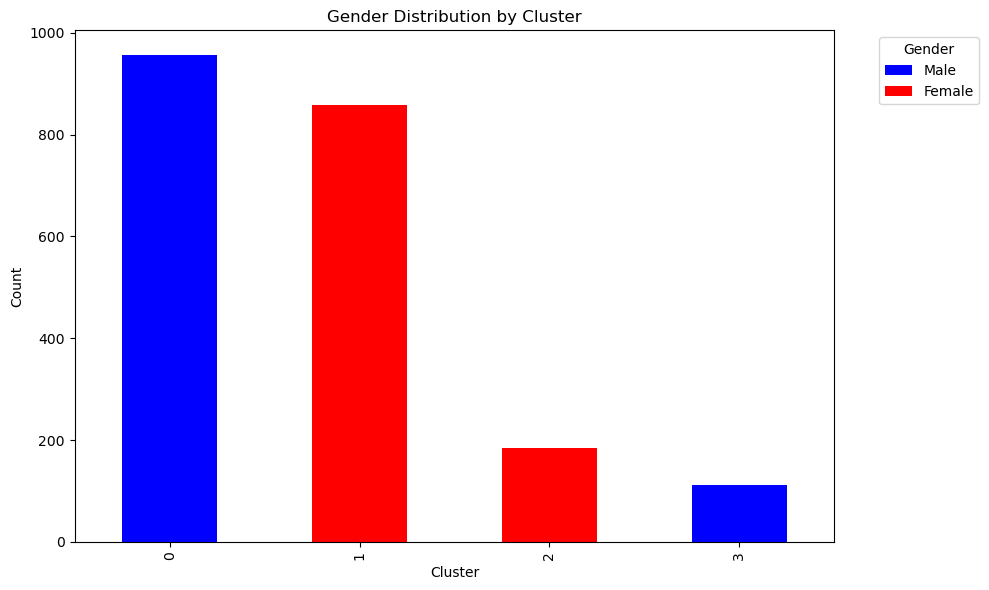

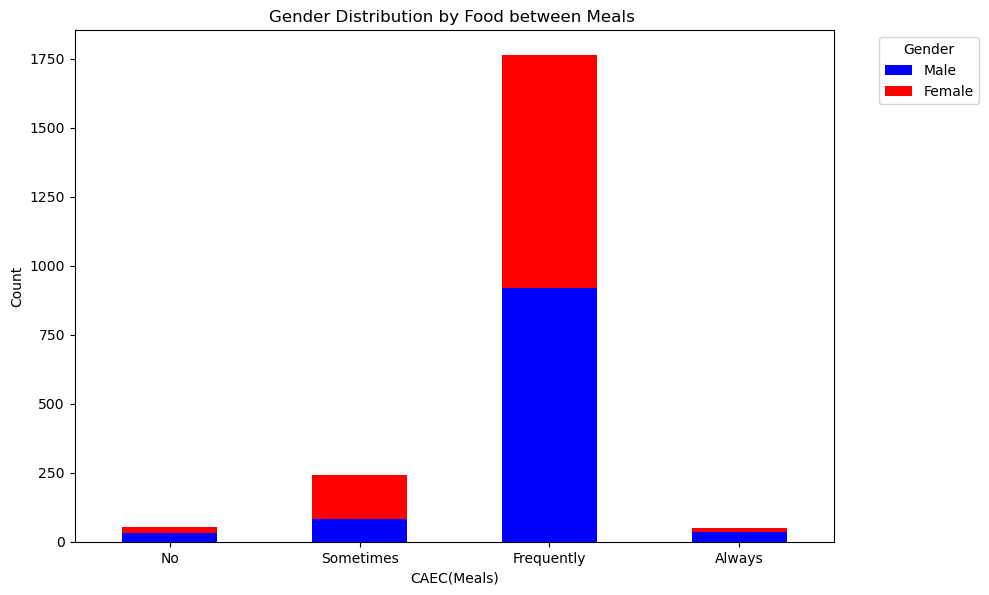

In [62]:
# Plotting

# Count the number of data points for each CAEC in each cluster
cluster_mtrans_counts = data.groupby(['Cluster', 'CAEC_encoded']).size().unstack(fill_value=0)

# Plot as a bar chart
cluster_mtrans_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red', 'brown'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of CAEC by Cluster')
plt.legend(title='CAEC', labels=['No', 'Sometimes', 'Frequently', 'Always'], bbox_to_anchor=(1.05, 1), loc='upper left') # <<<<<<<<<<<<<<<<<<
plt.tight_layout()
plt.show()


# Count the Gender distribution in each cluster
gender_distribution = data.groupby('Cluster')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution by Cluster')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Count the Gender distribution for each CAEC factor level
mtrans_gender_distribution = data.groupby('CAEC_encoded')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
mtrans_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('CAEC(Meals)')
plt.ylabel('Count')
plt.title('Gender Distribution by Food between Meals ')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Manually define new labels for the x-axis ticks
new_labels = ['No', 'Sometimes', 'Frequently', 'Always']

# Set the x-axis ticks and their labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.show()


In [64]:

# Graphs for Age vs MTRANS vs Cluster

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Correct_df' is your DataFrame
data = Correct_df

# Select the one-hot encoded Gender columns and the MTRANS_encoded column
data_clustering = data[['Gender_Male', 'Gender_Female', 'MTRANS_encoded']]

# Apply K-means clustering
k = 4  # Number of clusters (adjust based on your data)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_clustering)

# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_


print(data['Cluster'].value_counts())

print("Cluster Centers:")
print(kmeans.cluster_centers_)

print('MEANS:', data.groupby('Cluster').mean())



Cluster
2    877
0    770
3    298
1    166
Name: count, dtype: int64
Cluster Centers:
[[ 1.00000000e+00 -9.43689571e-16  3.03376623e+00]
 [ 3.33066907e-16  1.00000000e+00 -4.44089210e-16]
 [ 9.99200722e-16  1.00000000e+00  3.02166477e+00]
 [ 1.00000000e+00 -6.66133815e-16  2.34899329e-02]]
MEANS:               Age    Height    Weight  family_history_with_overweight  \
Cluster                                                                 
0        0.183543  0.574649  0.381172                        0.838961   
1        0.439345  0.321135  0.258063                        0.861446   
2        0.169927  0.372961  0.335472                        0.761688   
3        0.335249  0.602551  0.399690                        0.902685   

             FAVC      FCVC       NCP     SMOKE      CH2O       SCC       FAF  \
Cluster                                                                         
0        0.898701  2.256873  2.684901  0.029870  2.067701  0.020779  1.143262   
1        0.897590  

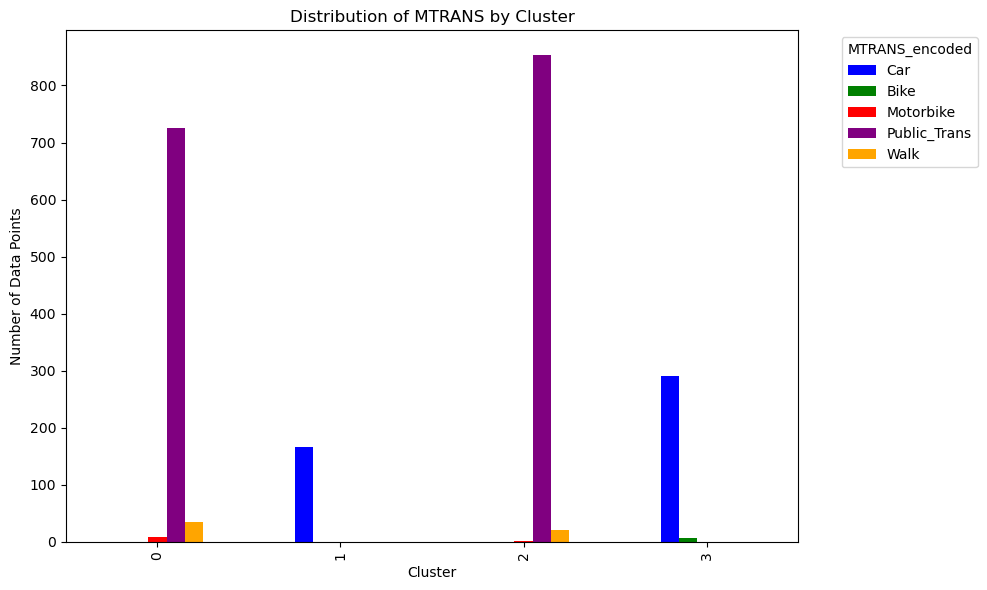

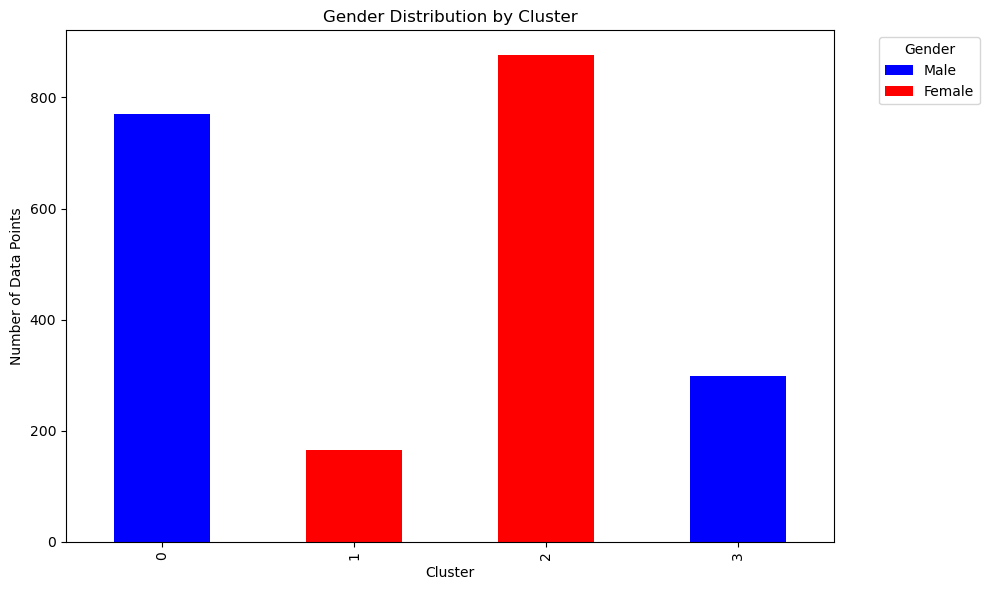

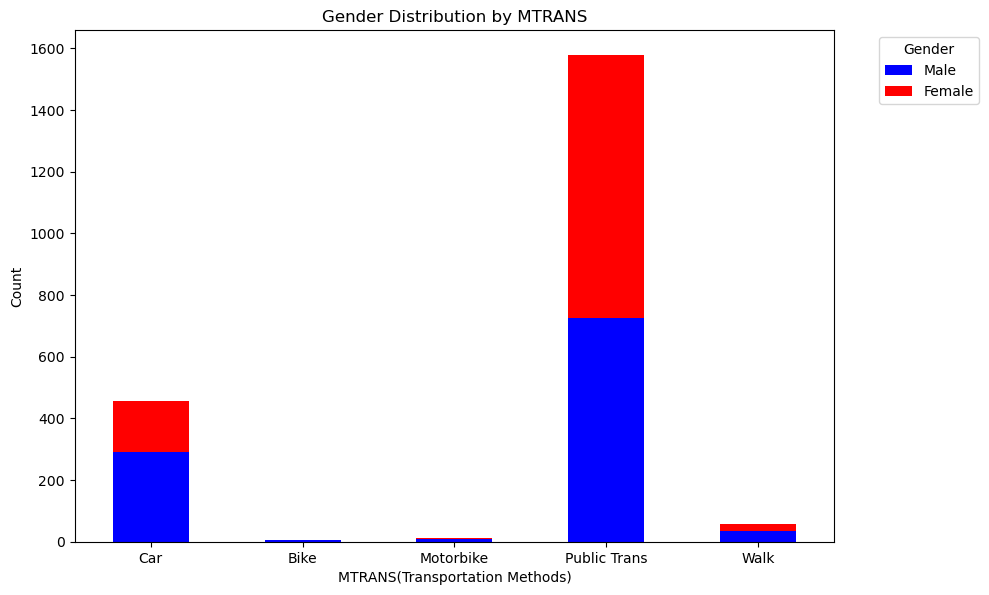

In [66]:
import matplotlib.pyplot as plt

# Count the number of data points for each MTRANS_encoded in each cluster
cluster_mtrans_counts = data.groupby(['Cluster', 'MTRANS_encoded']).size().unstack(fill_value=0)

# Plot as a bar chart
cluster_mtrans_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of MTRANS by Cluster')
plt.legend(title='MTRANS_encoded', labels=['Car', 'Bike', 'Motorbike', 'Public_Trans', 'Walk'], bbox_to_anchor=(1.05, 1), loc='upper left') # <<<<<<<<<<<<<<<<<<
plt.tight_layout()
plt.show()




# Count the Gender distribution in each cluster
gender_distribution = data.groupby('Cluster')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Gender Distribution by Cluster')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




# Count the Gender distribution for each MTRANS factor level
mtrans_gender_distribution = data.groupby('MTRANS_encoded')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
mtrans_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('MTRANS(Transportation Methods)')
plt.ylabel('Count')
plt.title('Gender Distribution by MTRANS')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Manually define new labels for the x-axis ticks
new_labels = ['Car', 'Bike', 'Motorbike', 'Public Trans', 'Walk']

# Set the x-axis ticks and their labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.show()



In [72]:
# Graphs for Gender v SMOKE

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Correct_df' is your DataFrame
data3 = Correct_df

# Select the one-hot encoded Gender columns and the MTRANS_encoded column
data_clustering = data3[['Gender_Male', 'Gender_Female', 'SMOKE']]

# Apply K-means clustering
k = 4  # Number of clusters (adjust based on your data)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_clustering)

# Add cluster labels to the DataFrame
data3['Cluster'] = kmeans.labels_


print(data3['Cluster'].value_counts())

print("Cluster Centers:")
print(kmeans.cluster_centers_)

print('MEANS:', data3.groupby('Cluster').mean())



Cluster
0    1039
1    1028
3      29
2      15
Name: count, dtype: int64
Cluster Centers:
[[ 1.00000000e+00 -9.99200722e-16 -1.49186219e-16]
 [ 9.99200722e-16  1.00000000e+00 -1.28369537e-16]
 [ 1.11022302e-16  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -5.55111512e-17  1.00000000e+00]]
MEANS:               Age    Height    Weight  family_history_with_overweight  \
Cluster                                                                 
0        0.223377  0.580068  0.383892                        0.857555   
1        0.211772  0.365666  0.324564                        0.775292   
2        0.283688  0.299371  0.226368                        0.933333   
3        0.315303  0.667215  0.474035                        0.827586   

             FAVC      FCVC       NCP  SMOKE      CH2O       SCC       FAF  \
Cluster                                                                      
0        0.906641  2.272515  2.731230    0.0  2.083660  0.023099  1.170207   
1        0.865759  2.564

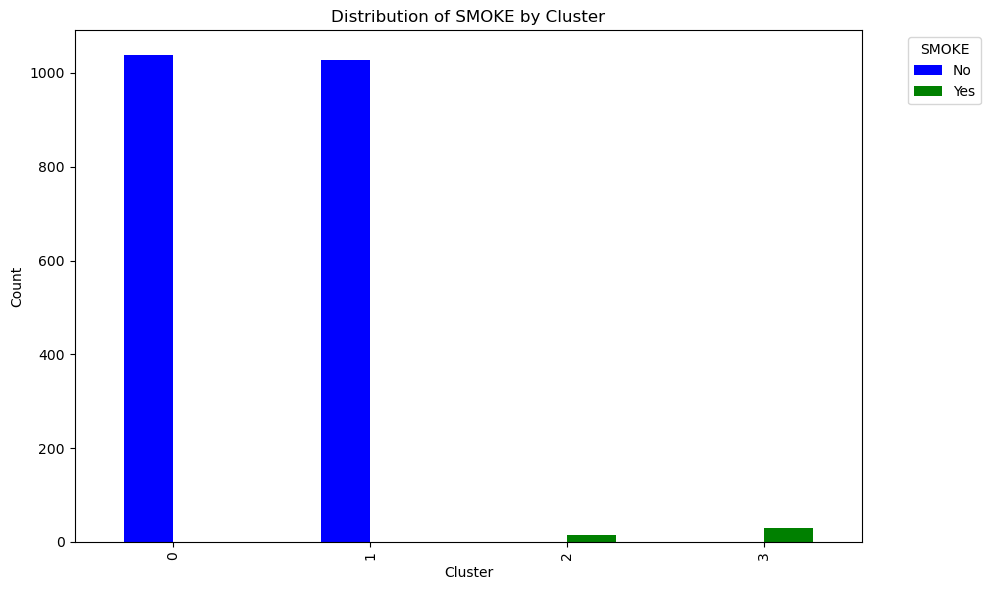

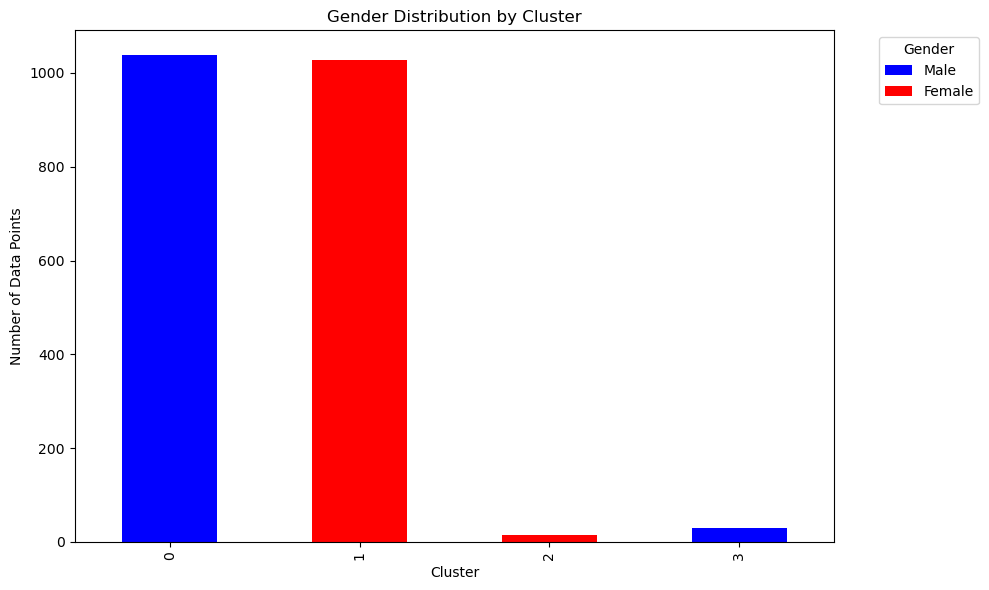

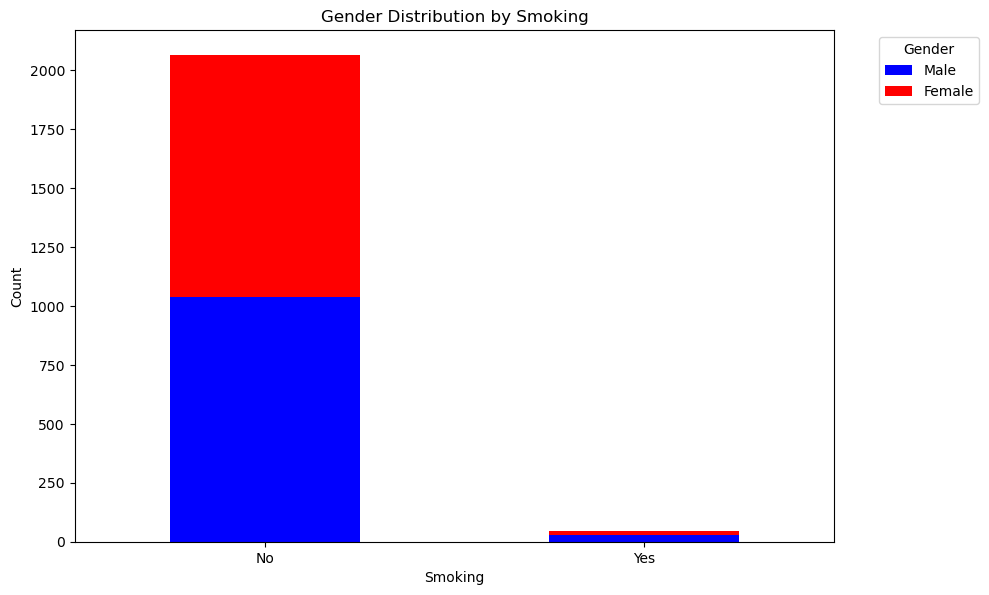

In [94]:
# Plotting Gender V Smoke

# Count the number of data points for each SMOKE in each cluster
cluster_SMOKE_counts = data3.groupby(['Cluster', 'SMOKE']).size().unstack(fill_value=0)

# Plot as a bar chart
cluster_SMOKE_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red', 'brown'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of SMOKE by Cluster')
plt.legend(title='SMOKE', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left') # <<<<<<<<<<<<<<<<<<
plt.tight_layout()
plt.show()




# Count the Gender distribution in each cluster
gender_distribution = data.groupby('Cluster')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Gender Distribution by Cluster')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




# Count the Gender distribution for each CAEC factor level
mtrans_gender_distribution = data.groupby('SMOKE')[['Gender_Male', 'Gender_Female']].sum()

# Plot as a stacked bar chart
mtrans_gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Gender Distribution by Smoking')
plt.legend(title='Gender', labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Manually define new labels for the x-axis ticks
new_labels = ['No', 'Yes']

# Set the x-axis ticks and their labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.show()


In [118]:
#  Gender v Age

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'Correct_df' is your DataFrame
data8 = Correct_df

# Select the one-hot encoded Gender columns and the MTRANS_encoded column
data_clustering = data8[['Gender_Male', 'Gender_Female', 'Age']]

# Apply K-means clustering
k = 4  # Number of clusters (adjust based on your data)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_clustering)

# Add cluster labels to the DataFrame
data8['Cluster'] = kmeans.labels_


print(data8['Cluster'].value_counts())

print("Cluster Centers:")
print(kmeans.cluster_centers_)

print('MEANS:', data8.groupby('Cluster').mean())



Cluster
1    893
0    796
2    272
3    150
Name: count, dtype: int64
Cluster Centers:
[[ 1.00000000e+00 -8.88178420e-16  1.61727595e-01]
 [ 8.88178420e-16  1.00000000e+00  1.64990117e-01]
 [ 1.00000000e+00 -5.55111512e-16  4.13591749e-01]
 [ 2.22044605e-16  1.00000000e+00  4.97473546e-01]]
MEANS:               Age    Height    Weight  family_history_with_overweight  \
Cluster                                                                 
0        0.161728  0.575898  0.352521                        0.830402   
1        0.164990  0.374154  0.333583                        0.752520   
2        0.413592  0.601563  0.485309                        0.933824   
3        0.497474  0.308505  0.261050                        0.926667   

             FAVC      FCVC       NCP     SMOKE      CH2O       SCC       FAF  \
Cluster                                                                         
0        0.895729  2.249562  2.752136  0.015075  2.118319  0.025126  1.196130   
1        0.857783  